<a href="https://colab.research.google.com/github/AngryToucan/yandex/blob/main/610_%D0%9A%D0%BE%D0%BB%D1%87%D0%B8%D0%BD_%D0%9B%D0%94_%D0%BD%D0%BE%D1%83%D1%82%D0%B1%D1%83%D0%BA_%D0%BF%D0%BE_%D0%9B%D0%A0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа. Визуализация данных**

Цель - изучить методы визуализации количественных и качественных данных.

Задачи: 
1. изучить методы визуализации количественных данных;
2. изучить методы визуализации качественных данных.

Задание. 
1. Загрузить два датафрейма по заработной плате рабочих и объединить их.
Данные по ссылке с сайта kaggle.com 
https://www.kaggle.com/anninasimon/employees-department-dataset и
https://www.kaggle.com/anninasimon/employee-salary-dataset 
2. Для объединенного датасета визуализировать данные, при необходимости нормализовать количественные данные и закодировать качественные данные. 
3. Сравнить методы визуализации количественных и качественных данных.
4. По итогам выполнения задания, опишите построенные графики, сформулируйте выводы;
5. По результатам проведенного анализа оформите отчет в Google-документе с указанием ссылки на решенный ноутбук. Отчет сохраните в формате *.docx и прикрепите в Moodle.

# 1. Визуализация данных


Методические указания.

*Библитека Pandas:*
1. Метод .hist() позволяет построить гистограмму: для построения по одному признаку указываем наименование колонки из датафрейма. Например,  df['Salary'].hist(); для построения гистограмм для всех переменных в датафрейме, используем df.hist().
2. Метод .plot - функция для построения графиков

*Библиотека Seaborn*:
 

* Метод .boxplot() построит диаграмму "Ящик с усами".
* Метод .countplot() построит диаграмму количества для качественной переменной.
* Метод .pairplot()  построит парные диаграммы рассеяния.
* Метод .heatmap(df.corr()) - построит тепловую карту корреляции признаков в датафрейме. 
* Метод .violinplot() - построит скрипичную диаграмму;
* Метод .heatmap(df.corr()) - построит тепловую карту корреляции признаков в датафрейме. 
* Метод .distplot() - построит график распределения переменной.

*Библиотека Matplotlib*. Модуль pyplot помогает в построении графиков.

Метод plt.plot() - позволяет построить линейный график;

Параметры данной функции:
*  plt.title - наименование графика;
*  plt.xlabel, plt.ylabel - наименование осей х, у;
*  plt.xticks, plt.yticks - маркировка точек по наблюдениям по оси х, у;
*  plt.legend() - добавление легенды графика (обозначение переменных);
*  plt.show() - отображение графика.

## 1.Визуализация одной переменной

Импортируем необходимые библиотеки и загружаем данные

In [ ]:
# импорт библиотек
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [ ]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'png' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8


In [ ]:
from google.colab import files
files.upload()

Saving Employee_Salary_Dataset.csv to Employee_Salary_Dataset.csv
Saving Department_Dataset.csv to Department_Dataset.csv


{'Department_Dataset.csv': b'ID,Dept_name,location,travel_required\r\n1,HR,Pune,yes\r\n2,Finance,Bangalore,no\r\n3,Finance,Bangalore,no\r\n4,Finance,Pune,no\r\n5,Tech,Mumbai,no\r\n6,Tech,Pune,no\r\n7,Tech,Bangalore,yes\r\n8,HR,Bangalore,no\r\n9,HR,Pune,no\r\n10,HR,Pune,no\r\n11,HR,Mumbai,no\r\n12,HR,Mumbai,yes\r\n13,Finance,Bangalore,yes\r\n14,Tech,Bangalore,yes\r\n15,Tech,Mumbai,yes\r\n16,Tech,Pune,yes\r\n17,Tech,Bangalore,no\r\n18,Finance,Mumbai,no\r\n19,HR,Mumbai,no\r\n20,Finance,Bangalore,no\r\n21,Tech,Mumbai,no\r\n22,Tech,Mumbai,yes\r\n23,Tech,Mumbai,no\r\n24,Tech,Pune,yes\r\n25,Finance,Pune,yes\r\n26,HR,Pune,no\r\n27,HR,Bangalore,no\r\n28,HR,Bangalore,no\r\n29,Finance,Bangalore,no\r\n30,Finance,Mumbai,no\r\n31,Tech,Mumbai,no\r\n32,Tech,Pune,yes\r\n33,HR,Mumbai,yes\r\n34,HR,Bangalore,yes\r\n35,Tech,Bangalore,no\r\n',
 'Employee_Salary_Dataset.csv': b'ID,Experience_Years,Age,Gender,Salary\r\n1,5,28,Female,250000\r\n2,1,21,Male,50000\r\n3,3,23,Female,170000\r\n4,2,22,Male,25000\r\n5

In [ ]:
#считываем данные
df1 = pd.read_csv('Employee_Salary_Dataset.csv')
df2 = pd.read_csv('Department_Dataset.csv')
df3=df1.merge(df2,
            how = "inner",
            left_on = "ID", right_on = "ID")

In [ ]:
df3

,ID,Experience_Years,Age,Gender,Salary,Dept_name,location,travel_required
0,1,5,28,Female,250000,HR,Pune,yes
1,2,1,21,Male,50000,Finance,Bangalore,no
2,3,3,23,Female,170000,Finance,Bangalore,no
3,4,2,22,Male,25000,Finance,Pune,no
4,5,1,17,Male,10000,Tech,Mumbai,no
5,6,25,62,Male,5001000,Tech,Pune,no
6,7,19,54,Female,800000,Tech,Bangalore,yes
7,8,2,21,Female,9000,HR,Bangalore,no
8,9,10,36,Female,61500,HR,Pune,no
9,10,15,54,Female,650000,HR,Pune,no


In [ ]:
df3.Gender = df3.Gender.replace({'Female': 1, 'Male': 0})
df3

,ID,Experience_Years,Age,Gender,Salary,Dept_name,location,travel_required
0,1,5,28,1,250000,HR,Pune,yes
1,2,1,21,0,50000,Finance,Bangalore,no
2,3,3,23,1,170000,Finance,Bangalore,no
3,4,2,22,0,25000,Finance,Pune,no
4,5,1,17,0,10000,Tech,Mumbai,no
5,6,25,62,0,5001000,Tech,Pune,no
6,7,19,54,1,800000,Tech,Bangalore,yes
7,8,2,21,1,9000,HR,Bangalore,no
8,9,10,36,1,61500,HR,Pune,no
9,10,15,54,1,650000,HR,Pune,no


## 1.1. Визуализация количественных данных

Визуализируем количественные данные с помощью:
1. гистогаммы;
2. ящика с усами;
3. диаграммы рассеяния (точечная диаграмма).

 Гистограмма по уровню заработной платы работников

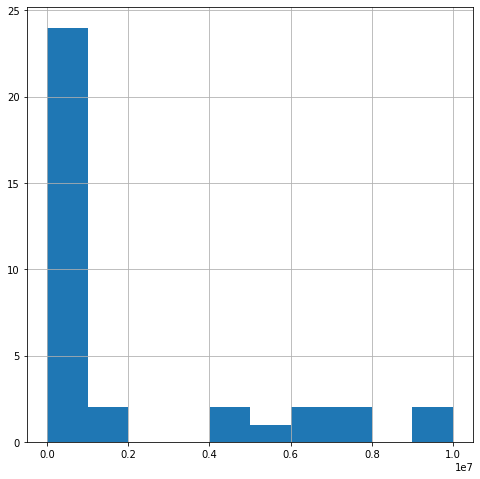

In [ ]:
df3['Salary'].hist();

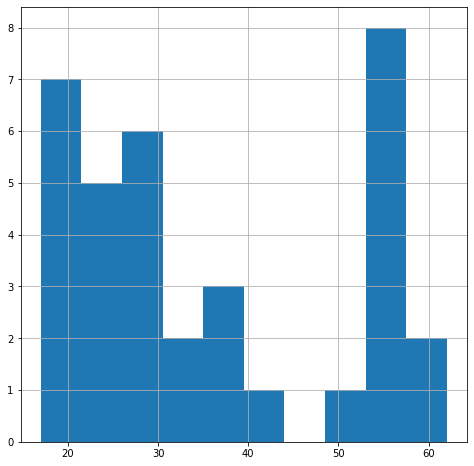

In [ ]:
df3['Age'].hist()

Гистограмма для всех переменных в наборе данных

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f623f251a90>,
      dtype=object)

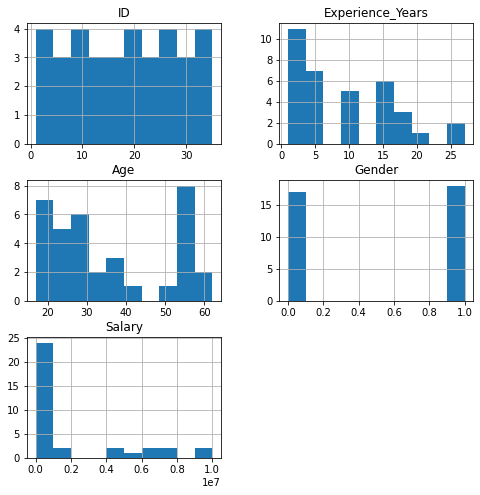

In [ ]:
df3.hist()

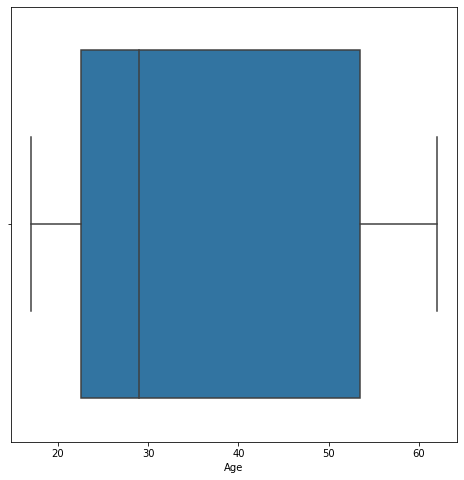

In [ ]:
sns.boxplot(df3['Age']);

Задание. Постройте ящик с усами по уровню дохода и формулируйте выводы.

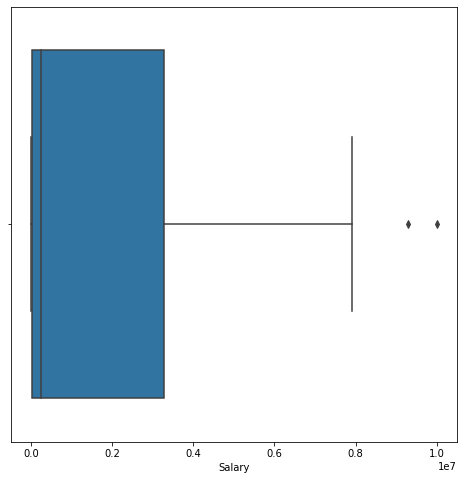

In [ ]:
sns.boxplot(df3['Salary']);
df3.Salary()
#в зарплате есть 2 выброса - точки справа с очень высокими значениями
#0,8 - верхняя граница
#Медиана близка к 0 
# верхний квартиль близок к 0,35
#

Визуализируем несколько ящиков с усами по количественным признакам в наборе данных.

Для этого создадим новый датафрейм с указанием переменных для которых необходимо построить диаграмму, и передать его в функцию melt() и в аргумент data.

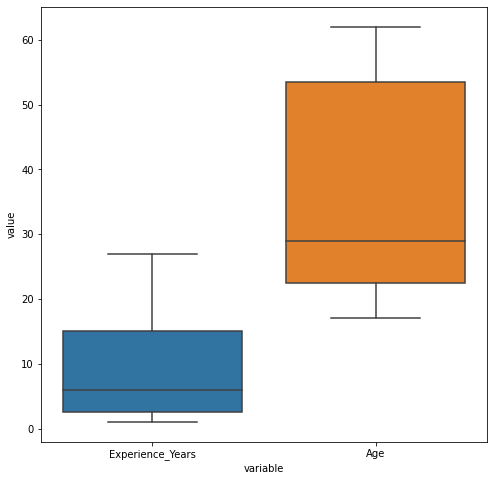

In [ ]:
df4 = pd.DataFrame(data=df3, columns=["Experience_Years", "Age"])
sns.boxplot(x="variable", y="value", data=pd.melt(df4))

## 1.2 Визуализация качественных данных

Визуализируем качественные данные с помощью диаграммы количества (counplot) 

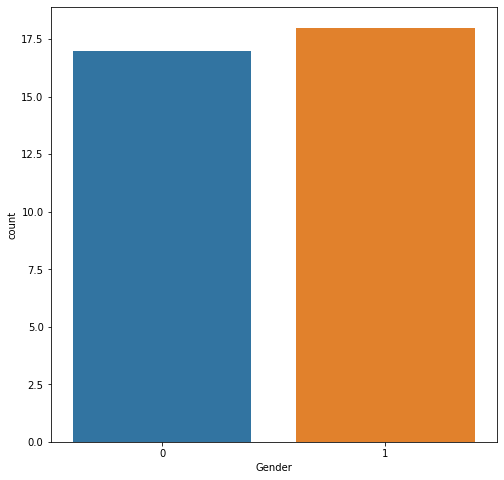

In [ ]:
sns.countplot(df3['Gender']);

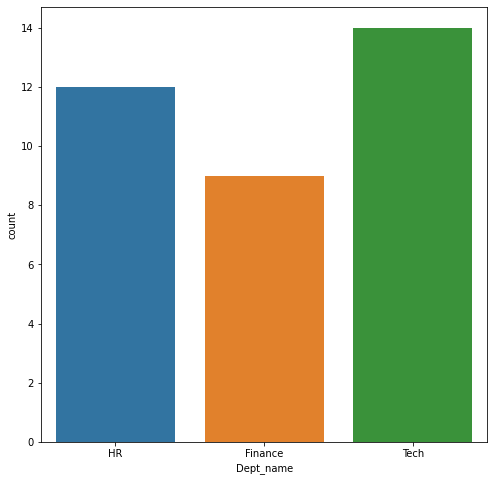

In [ ]:
sns.countplot(df3['Dept_name'], orient='h')

## 2.Визуализация взаимосвязей в данных

Визуализируем взаимосвязи между количественными данными и качественными, построив:
1. парные диаграммы;
2. "горячую" карты;
3. ящик с усами;
4. диаграмму "скрипки";
5. диаграмму количества для взаимосвязей качественных данных;

## 2.1 Количественных данных

Построим гистограмму barplot распределения дохода по возрастам, параметр ci - позволяет изменить доверительный интервал (None - отключение параметра , sd - стандартное отклонение (вместо среднего)). 

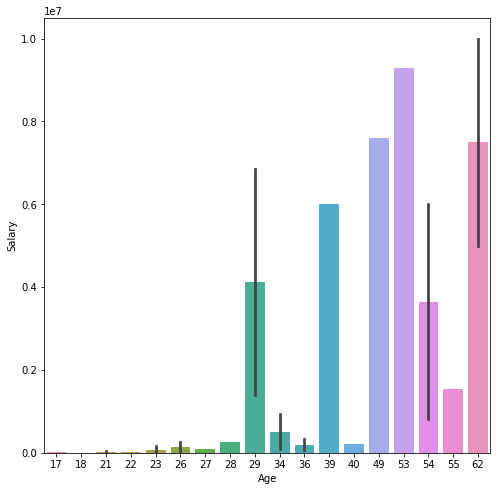

In [ ]:
sns.barplot(x="Age", y="Salary", data=df3)
#с увеличением возрастом увеличивается з/п

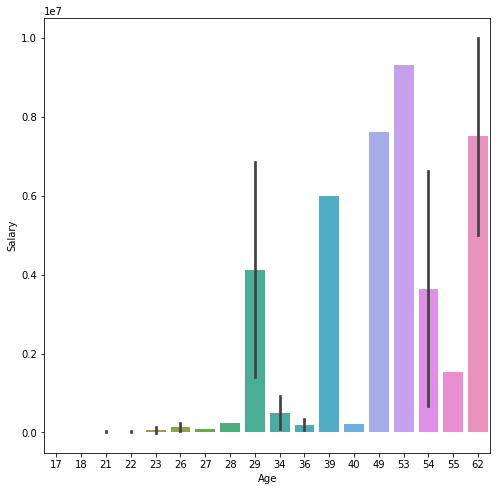

In [ ]:
sns.barplot(x="Age", y="Salary", data=df3, ci="sd")
# доверительный интервал отбрасывает малые значения

Построим точечную диаграмму scatterplot

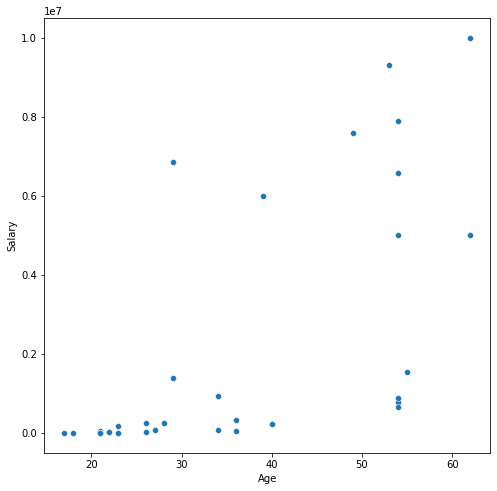

In [ ]:
sns.scatterplot(data=df3, x="Age", y="Salary")
#С увеличением созраста увеличивается доход

Добавим параметр hue="Gender" и size="Salary". Параметр  hue - группирует данные; size - определяет размер точки по выбранному признаку

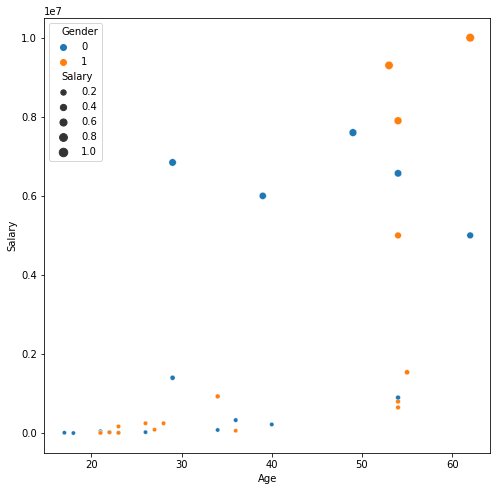

In [ ]:
sns.scatterplot(data=df3, x="Age", y="Salary", hue="Gender", size="Salary")
# у женщин максимальный доход (3 верхних значения)

Задание. Сравните по графику уровень дохода по полу и размеру заработной платы 

Построим парные точечные диаграммы

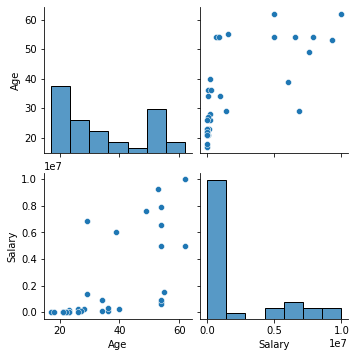

In [ ]:
sns.pairplot(df3[['Age', 'Salary']]);
# выводы аналогчиные вышестоящим графикам

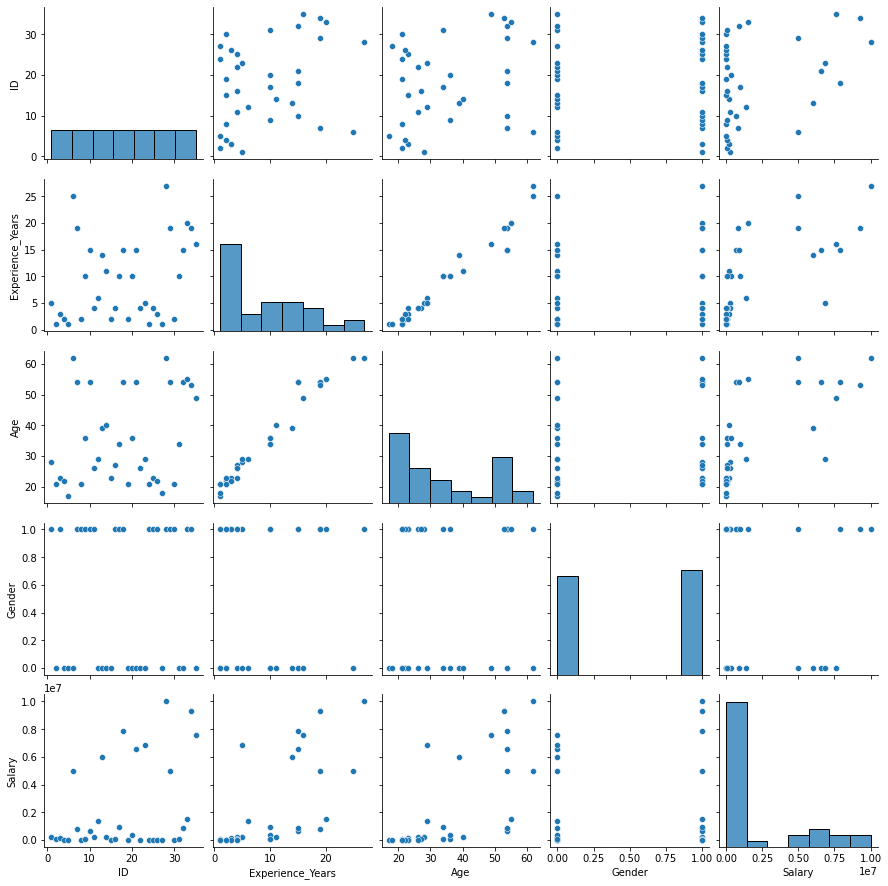

In [ ]:
sns.pairplot(df3)
#чем больше возраст, тем больше опыт работы

Задание. Постройте точечный график для сравнения уровня заработной платы и стажа работы работника.

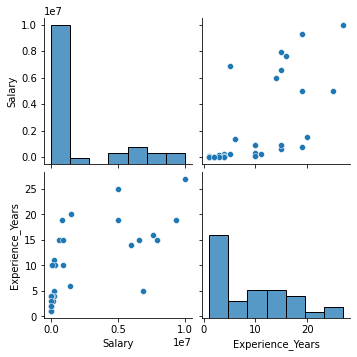

In [ ]:
sns.pairplot(df3[['Salary', 'Experience_Years']]);
# Зарплата растет с опытом работы

Построим теловую карту для данных

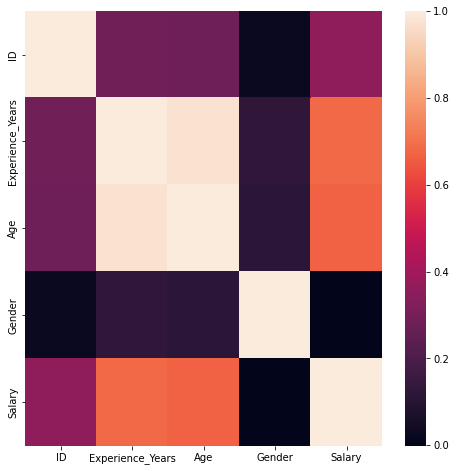

In [ ]:
sns.heatmap(df3.corr());
# гендер и зарплата не имеют связи

Добавим в тепловую карту значения коэффициентов корреляции (annot=True, формат записи - до 2 знаков fmt=".1f" ) и название диаграммы (pad- определяет отступ заголовка диаграммы от тепловой карты)

Text(0.5, 1.0, 'Матрица корреляций')

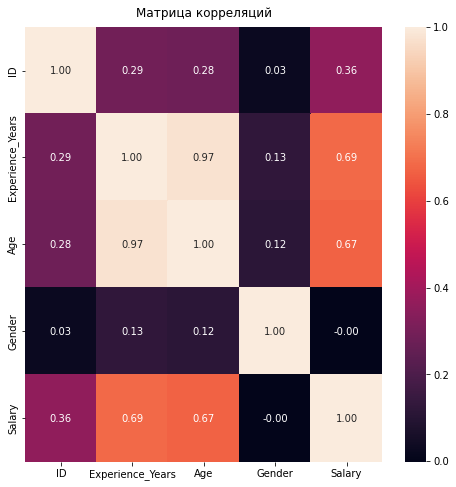

In [ ]:
heatmap = sns.heatmap(df3.corr(), fmt=".2f", annot=True)
heatmap.set_title('Матрица корреляций', pad=10)
# зарплата и возраст значительно связаны прямо

Оценим взаимосвязь зависимой переменной (например, доход) от независимых переменных и построим тепловую карту

In [ ]:
df3.corr()[['Salary']].sort_values(by='Salary', ascending=False)
#зарплата и опыт работы значительно связаны прямо

,Salary
Salary,1.000000
Experience_Years,0.685600
Age,0.668444
ID,0.362092
Gender,-0.001393


Text(0.5, 1.0, 'Оценка корреляции дохода и независимых переменных')

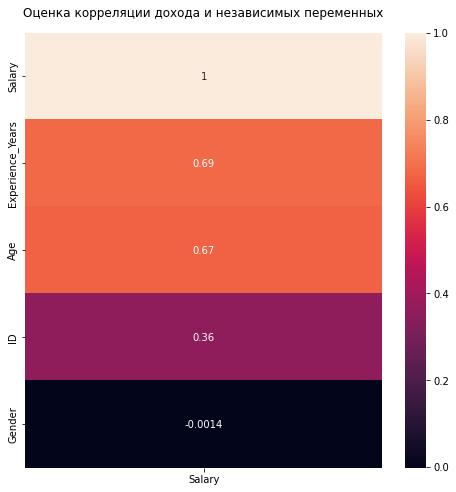

In [ ]:
heatmap = sns.heatmap(df3.corr()[['Salary']].sort_values(by='Salary', ascending=False), annot=True)
heatmap.set_title('Оценка корреляции дохода и независимых переменных', pad=16)
#выводы аналогичные вышестоящим графикам

График joint_plot -  это сочетание двух диаграмм scatter plot и histogram, для более детального анализа взаимосвязи двух количественных признаков.

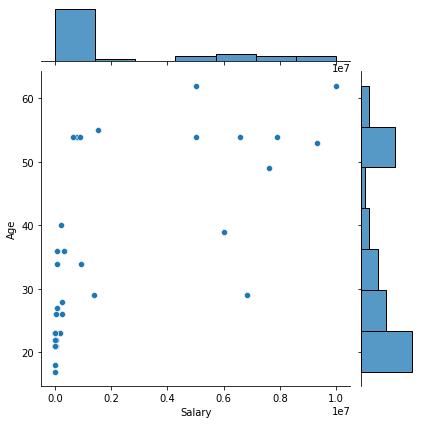

In [ ]:
sns.jointplot(x='Salary', y='Age', 
              data=df3, kind='scatter');
# более заметна большая прослойка среди молодых людей с малой зарплатой

Построим ящик с усами для оценки распределения дохода в зависимости от необходимости поездок

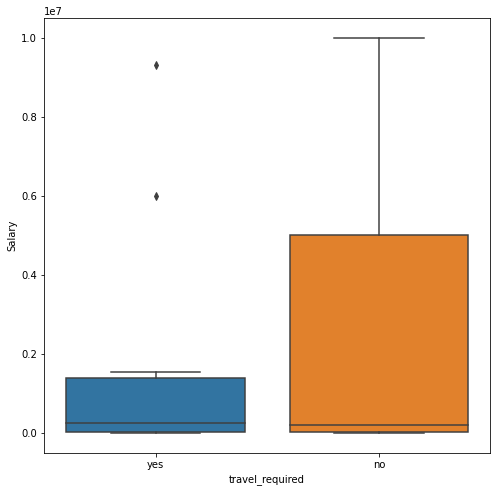

In [ ]:
sns.boxplot(x='travel_required', y='Salary', data=df3);
#зарплата выше в среднем у тех, кому не требуется добираться до работы, однако есть 2 высоких выброса у тех, кто добирается

Добавим название графику и подпишем оси.

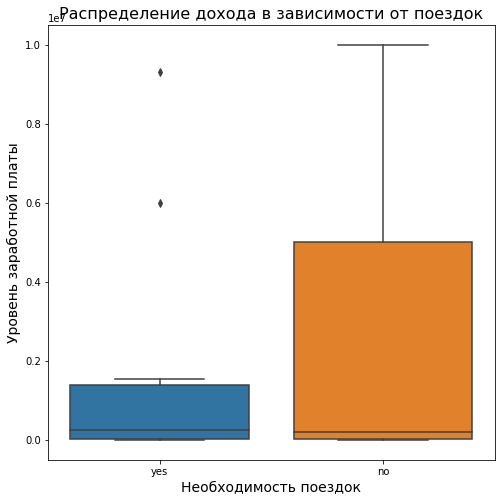

In [ ]:
boxplot = sns.boxplot(x='travel_required', y='Salary', data=df3);
boxplot.axes.set_title("Распределение дохода в зависимости от поездок", fontsize=16)
boxplot.set_xlabel("Необходимость поездок", fontsize=14)
boxplot.set_ylabel("Уровень заработной платы", fontsize=14);

## 2.2 Качественных данных

Построим диаграмму распределения работников по департаментам в разрезе по полу. На графике укажем название и подпишем оси, и внесем новые цвета palette='hls'. Для группировки данных используем аргумент 'hue'.

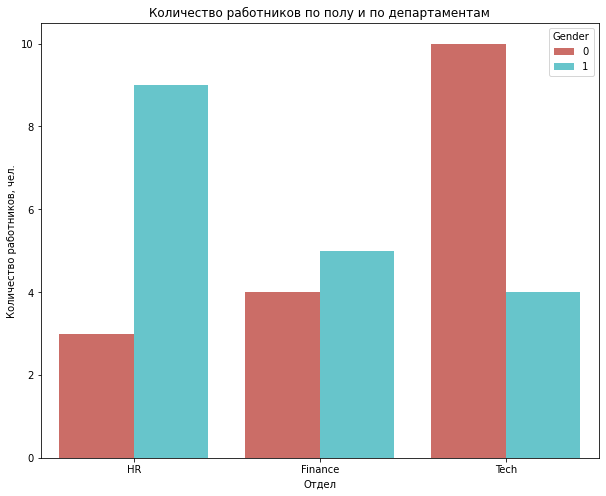

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.countplot(data=df3,x='Dept_name',hue='Gender', palette='hls')
plt.title('Количество работников по полу и по департаментам')
plt.xlabel('Отдел')
plt.ylabel('Количество работников, чел.')
plt.show()
# в HR явно преобладают женщины, а в Tech преобладают мужчины

Задание. Построить диаграмму barplot оценки дохода по полу

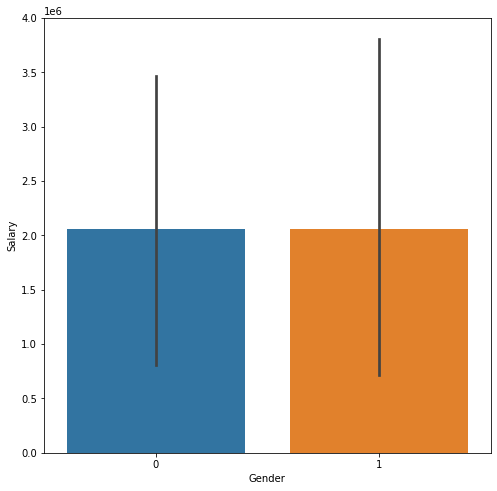

In [ ]:
sns.barplot(x="Gender", y="Salary", data=df3)
# в среднем различий между доходами женщин и мужчин нет

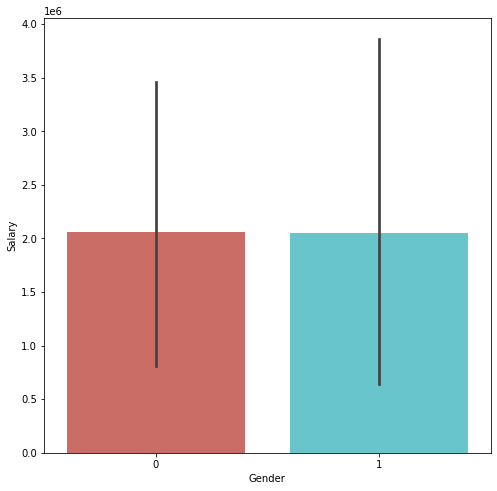

In [ ]:
##ответ 
sns.barplot(x="Gender", y="Salary", data=df3, palette='hls');

Сгруппируем данные по полу и по департаментам и построим barplot

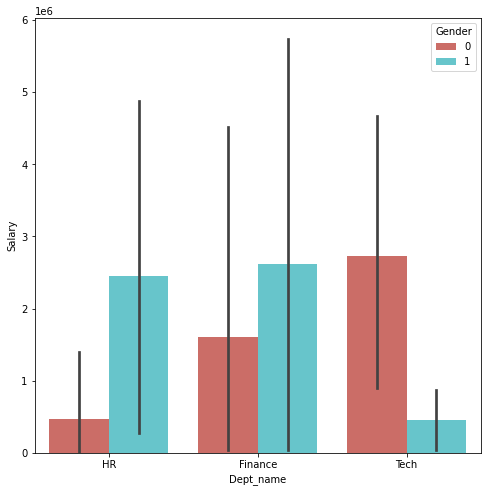

In [ ]:
sns.barplot(x="Dept_name", y="Salary", data=df3, palette='hls', hue='Gender')
#доход мужчин в HR значительно ниже, чем доход женщин
#в финансах очень большой размах зарплаты, что делает среднее значение менее репрезентативным для анализа для обоих гендеров

Построим ящик с усами распределения опыта работы в зависимости от департамента работы работника.

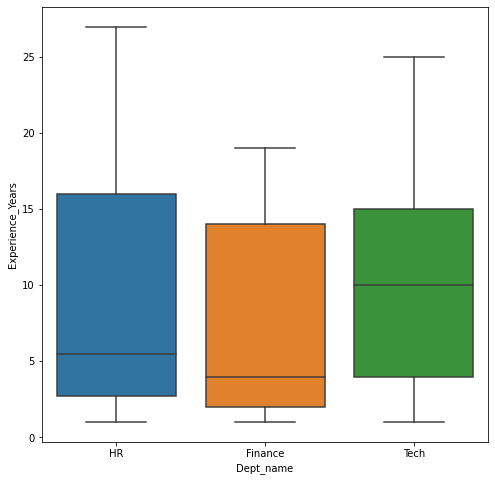

In [ ]:
sns.boxplot(x='Dept_name', y='Experience_Years', data=df3);
# медианное значение опыта работы в HR - 5 лет, но присутствует большой размах, т.е. очень опытных сотрудников довольно мало

Построим распределение опыта работы в разрезе двуз признаков по полу и по департаментам для последующего сравнения и анализа данных по группам.

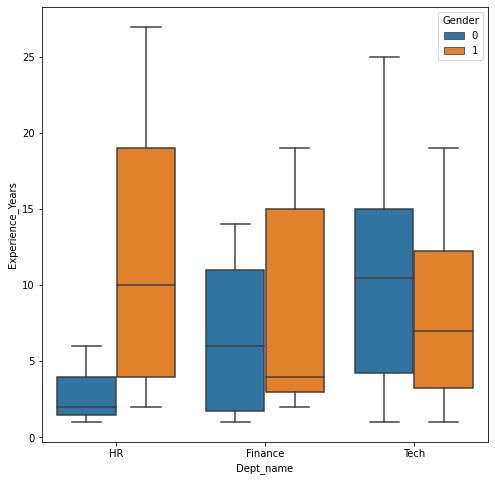

In [ ]:
sns.boxplot(x='Dept_name', y='Experience_Years', data=df3, hue='Gender');
# продолжая анализ по HR, заметно, что у мужчин гораздо меньше медианный опыт работы, чем у женщин, т.е. возможно, 
#что более низкие зарплаты у мужчин могут быть вызваны из-за опыта работы, а не из-за гендера

Задание. 
1. Постройте "ящики с усами" по распределению опыта работы по полу и по месту нахождения работника; Опишите полученные графики и сравните полученные по графику значения стажа работы в зависимости от пола и места нахождения работника. 
2. Постройте "ящики с усами" по распределению дохода по полу, по департаменту и по месту нахождения работника; Опишите полученные графики и сравните полученные по графику значения дохода в зависимости от пола и места нахождения работника. 

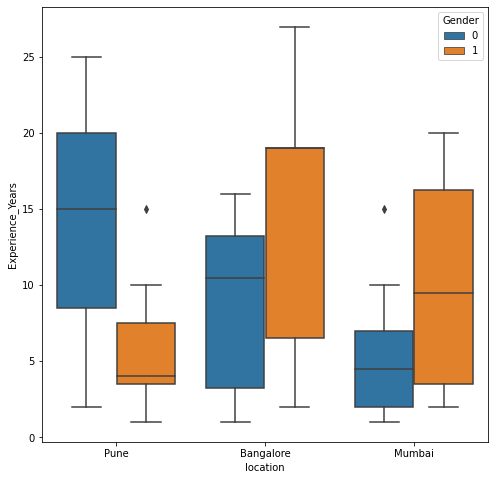

In [ ]:
sns.boxplot(x='location', y='Experience_Years', data=df3, hue='Gender');
# у мужчин из Pune гораздо выше медианный опыт работы, чем у женщин, у женщин из Mumbai медианный опыт работы выше на 5 лет, чем у мужчин


Построим график "скрипки" для сравнения опыта работы по полу и департаменту.

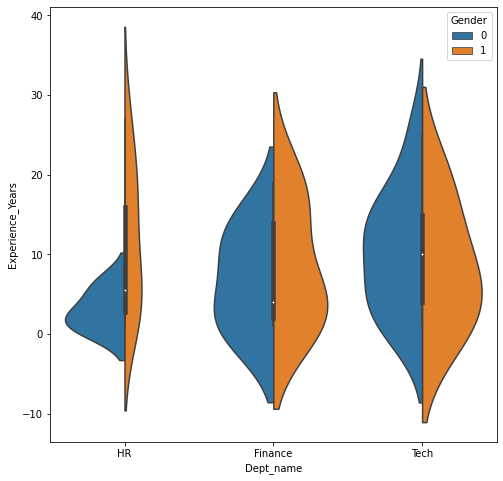

In [ ]:
sns.violinplot(x='Dept_name', y='Experience_Years', hue='Gender', data=df3, split=True);
# в finance и tech распределения опыта работы равномерны, а в HR у мужчин почти вся плотность распределена у минимального опыта работы

Построим график "скрипки" для сравнения возраста работников по полу и департаменту.

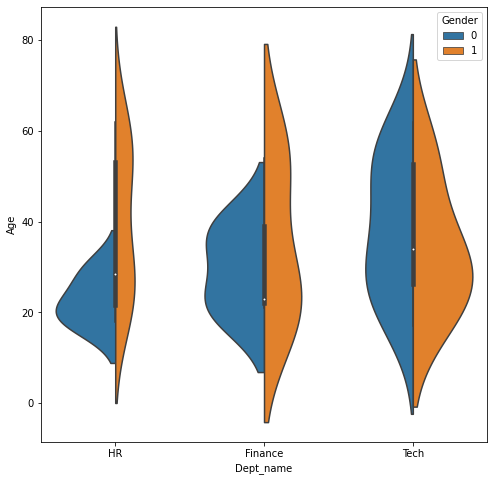

In [ ]:
sns.violinplot(x='Dept_name', y='Age', hue='Gender', data=df3, split=True);

Задание. Постройте график для оценки уровня дохода работников по полу в зависимости от департамента и опишите, полученные результаты. 

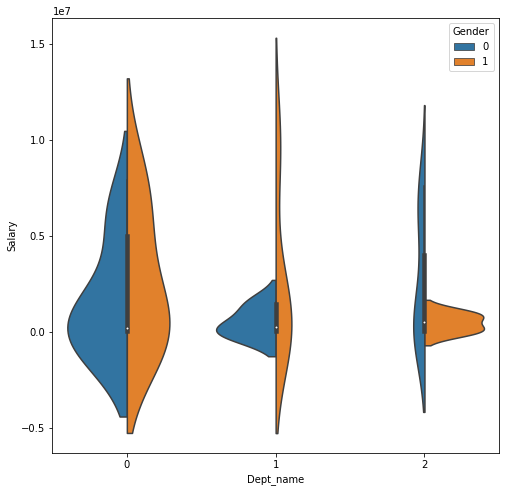

In [ ]:
sns.violinplot(x='Dept_name', y='Salary', data=df3, hue='Gender',split= True);

Построим гистограмму распределения работников по полу и департаменту. 

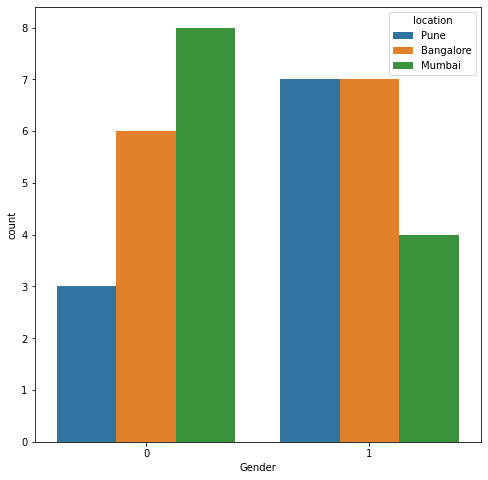

In [ ]:
sns.countplot(x='Gender', hue='location', data=df3);

## 3.Визуальный анализ распределения переменных

Визуализируем распределение переменных из набора данных, используя:
1. диаграмму распределения;
2. ящик с усами;
3. парные диаграммы рассеяния.

График распределения переменной

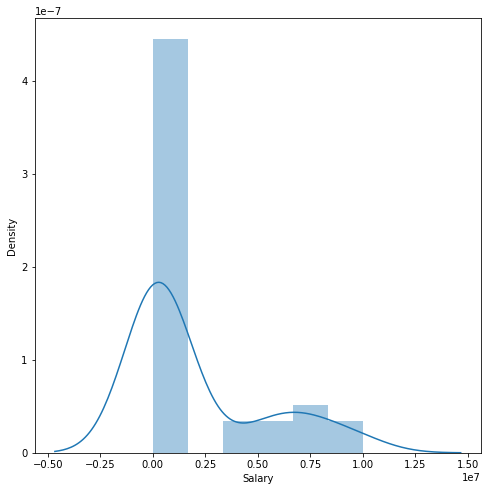

In [ ]:
%config InlineBackend.figure_format = 'png' 
sns.distplot(df3.Salary)
#заметен выброс плотности при минимальных значениях з/п

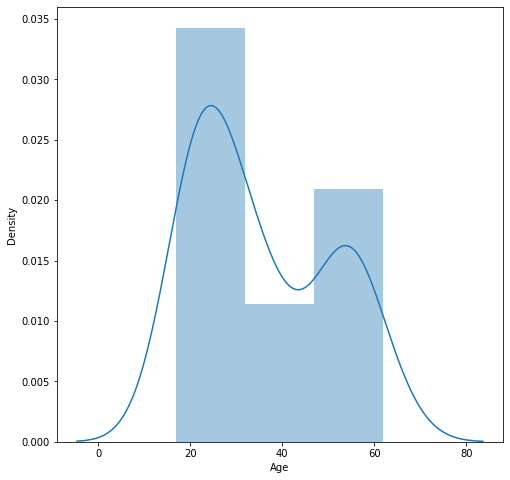

In [ ]:
%config InlineBackend.figure_format = 'png' 
sns.distplot(df3['Age']);
#в выборке гораздо больше молодых рабготников

Построим точечные диаграммы распределения переменных по полу

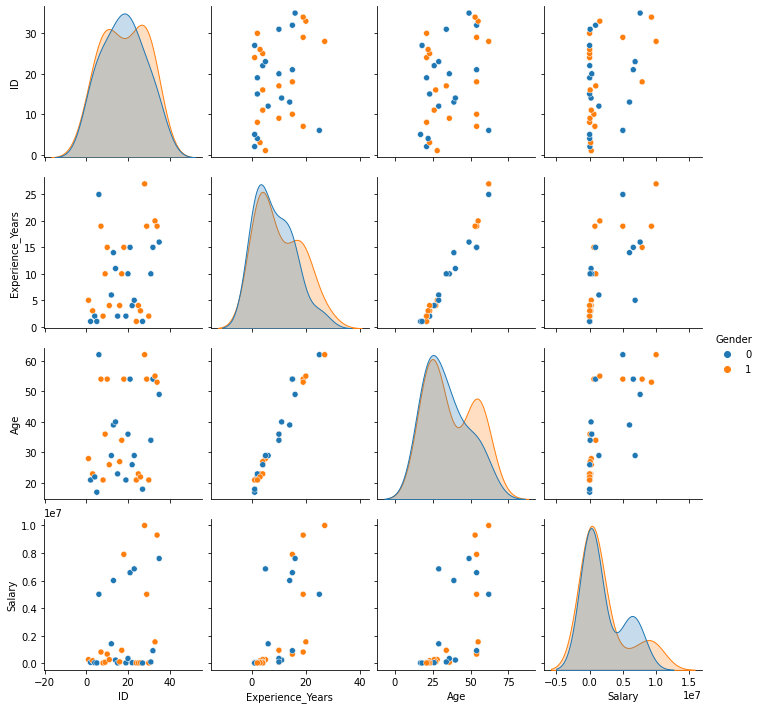

In [ ]:
sns.pairplot(df3, hue="Gender")
#нет заметных отличий между мужчинами и женщинами в зарплате


Ящик с усами

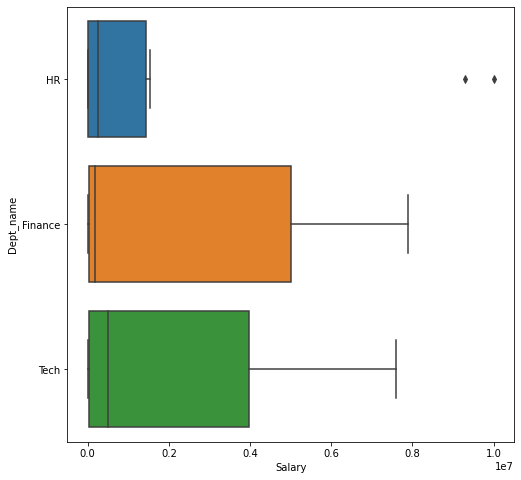

In [ ]:
sns.boxplot(y="Dept_name", x="Salary", data=df3, orient="h");

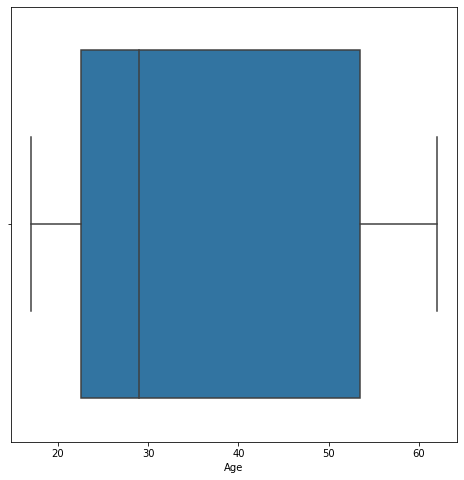

In [ ]:
sns.boxplot(df3['Age']);

Парные диаграммы взаимосвязи переменных

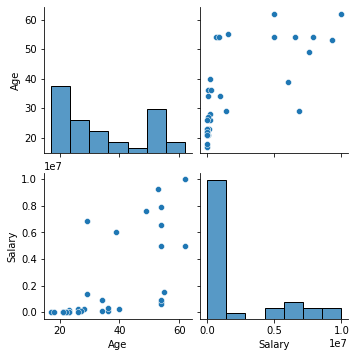

In [ ]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df3[['Age', 'Salary', 'Dept_name']]);

График распределения дохода по возрасту

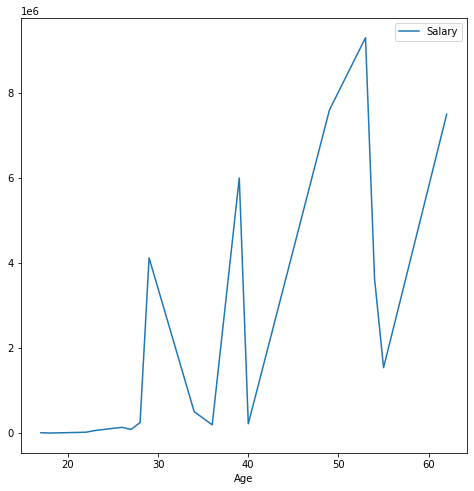

In [ ]:
df3[['Salary', 'Age']].groupby('Age').mean().plot();
# наибольший доход у людей в возрасте ~50

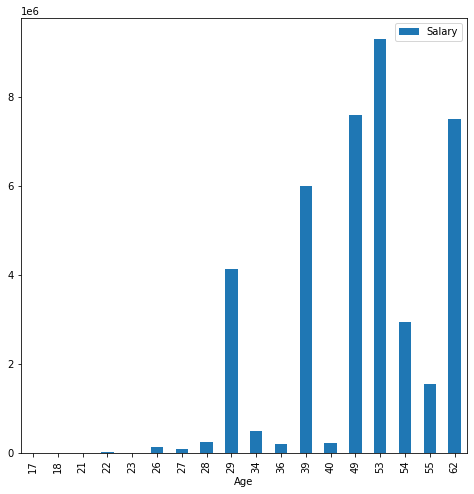

In [ ]:
df3[['Salary', 'Age']].groupby('Age').median().plot(kind='bar');
# чем больше возраст, тем больше з/п

Построим heat map

In [ ]:
pivot1 = df3.pivot_table(['Age','Experience_Years','Salary'], ['Dept_name', 'Gender'], aggfunc='mean')
pivot1

Age  Experience_Years        Salary
Dept_name Gender                                           
0         0       29.500000          6.750000  1.601262e+06
          1       35.000000          8.600000  2.617000e+06
1         0       22.666667          3.000000  4.726667e+05
          1       39.666667         11.666667  2.453389e+06
2         0       38.800000         10.400000  2.725860e+06
          1       34.000000          8.500000  4.557500e+05

In [ ]:
df3.Dept_name = df3.Dept_name.replace({'Finance': 0, 'HR': 1, 'Tech': 2})
df3

,ID,Experience_Years,Age,Gender,Salary,Dept_name,location,travel_required
0,1,5,28,1,250000,1,Pune,yes
1,2,1,21,0,50000,0,Bangalore,no
2,3,3,23,1,170000,0,Bangalore,no
3,4,2,22,0,25000,0,Pune,no
4,5,1,17,0,10000,2,Mumbai,no
5,6,25,62,0,5001000,2,Pune,no
6,7,19,54,1,800000,2,Bangalore,yes
7,8,2,21,1,9000,1,Bangalore,no
8,9,10,36,1,61500,1,Pune,no
9,10,15,54,1,650000,1,Pune,no


In [ ]:
pivot = df3.pivot_table(['Age','Experience_Years','Salary'], ['location', 'Gender'], aggfunc='mean')
pivot

Age  Experience_Years        Salary
location  Gender                                           
Bangalore 0       33.833333          8.833333  2.367192e+06
          1       43.000000         14.142857  3.744143e+06
Mumbai    0       29.125000          5.625000  1.869062e+06
          1       39.000000         10.250000  2.424025e+06
Pune      0       46.000000         14.000000  1.975333e+06
          1       30.142857          6.000000  1.547714e+05

In [ ]:
pivot2  = df3.pivot_table(
                        index='Dept_name', 
                        columns='Gender', 
                        values='Salary', 
                        aggfunc=np.max).fillna(0).applymap(float)
pivot2

Gender,0,1
Dept_name,,
0,6000050.0,7900000.0
1,1400000.0,10000000.0
2,7600000.0,930000.0


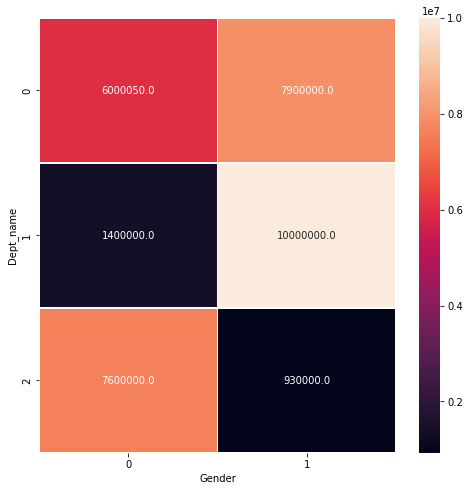

In [ ]:
sns.heatmap(pivot2, annot=True, fmt=".1f", linewidths=.5)
#максимальный доход у женщин в департаменте HR 

Задание. 
Сформулировать выводы по построенным графикам в виде аналитической записки и внести в Отчет по лабораторной работе в раздел "Общий вывод по итогам проведенного анализа". 



Примечание. Отчет по лабораторной работе сформируйте в Google-документе, ссылку на отчет укажите на титульном листе отчета. В отчете указажите сслыку на решенный ноутбук. Ноутбук необходимо переименовать следующим образом "612_Иванов ИИ.Ноутбук по ЛР___". Отчет по лабораторной работе сохраните в формате *.docx и прикрепите в Moodle. 